### 1. What are 3 areas in industry where computer vision is currently being used?

I. Defects detection on assembly line <br>
II. Self-driving vehicles <br>
III. Face recognition 

### 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting occurs when a machine learning model is trained on the training data repeatedly. Over time the model will perform very well on the training data, but poorly on the test data. 

### 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. Note: there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

I. Hold-out: Splitting the whole dataset to training and testing datasets. <br>
II. Data Augmentation: Creates new data from the available data. <br>
III. Regularization:  This makes the model learn broader patterns rather then memorizing the data.

### 4. Spend 20-minutes reading and clicking through the <a href="https://poloclub.github.io/cnn-explainer/"> CNN Explainer website </a>.
    * Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.

### 5. Load the <a href="https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST">torchvision.datasets.MNIST()</a> train and test datasets.

In [93]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from random import randrange
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from torchmetrics import Accuracy


In [46]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [42]:
train_data = datasets.MNIST(root='data',train=True,download=True,transform=ToTensor())
test_data = datasets.MNIST(root='data',train=False,download=True,transform=ToTensor())

### 6. Visualize at least 5 different samples of the MNIST training dataset.

In [43]:
class_name =  train_data.classes

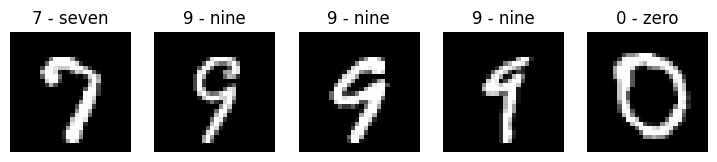

In [44]:
fig = plt.figure(figsize=(9,9))
row,colm = 1,5
for i in range(1,row*colm+1):
    random_index = torch.randint(1,len(train_data),size=[1]).item()
    image,label = train_data[random_index]
    fig.add_subplot(row,colm,i)
    plt.title(class_name[label])
    plt.axis(False)
    plt.imshow(image.squeeze(),cmap="gray")

### 7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [45]:
train_dataloader =  DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=32)   

### 8. Recreate model_2 used in this notebook (the same model from the <a href='https://poloclub.github.io/cnn-explainer/'>CNN Explainer website</a>, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [103]:
class MNISTModel(nn.Module):
    def __init__(self,input_shape,output_shape,hidden_units):
        super().__init__()
        self.block_1= nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.linear_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
        )
        
    def forward(self,x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.linear_layer(x)


model_0 = MNISTModel(input_shape=1,output_shape=len(class_name),hidden_units=10)
next(model_0.parameters()).device

device(type='cpu')

### 9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.

In [104]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.03)

In [105]:
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"----Epoch: {epoch}----")
    model_0.train()
    for batch,(X,y) in enumerate(train_dataloader):
        
        y_prod = model_0.forward(X)

        y_pred = torch.softmax(y_prod.argmax(dim=1))
        print(y_pred)

    

  0%|          | 0/3 [00:00<?, ?it/s]


----Epoch: 0----


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x160 and 490x10)